### $\theta$ only in I class

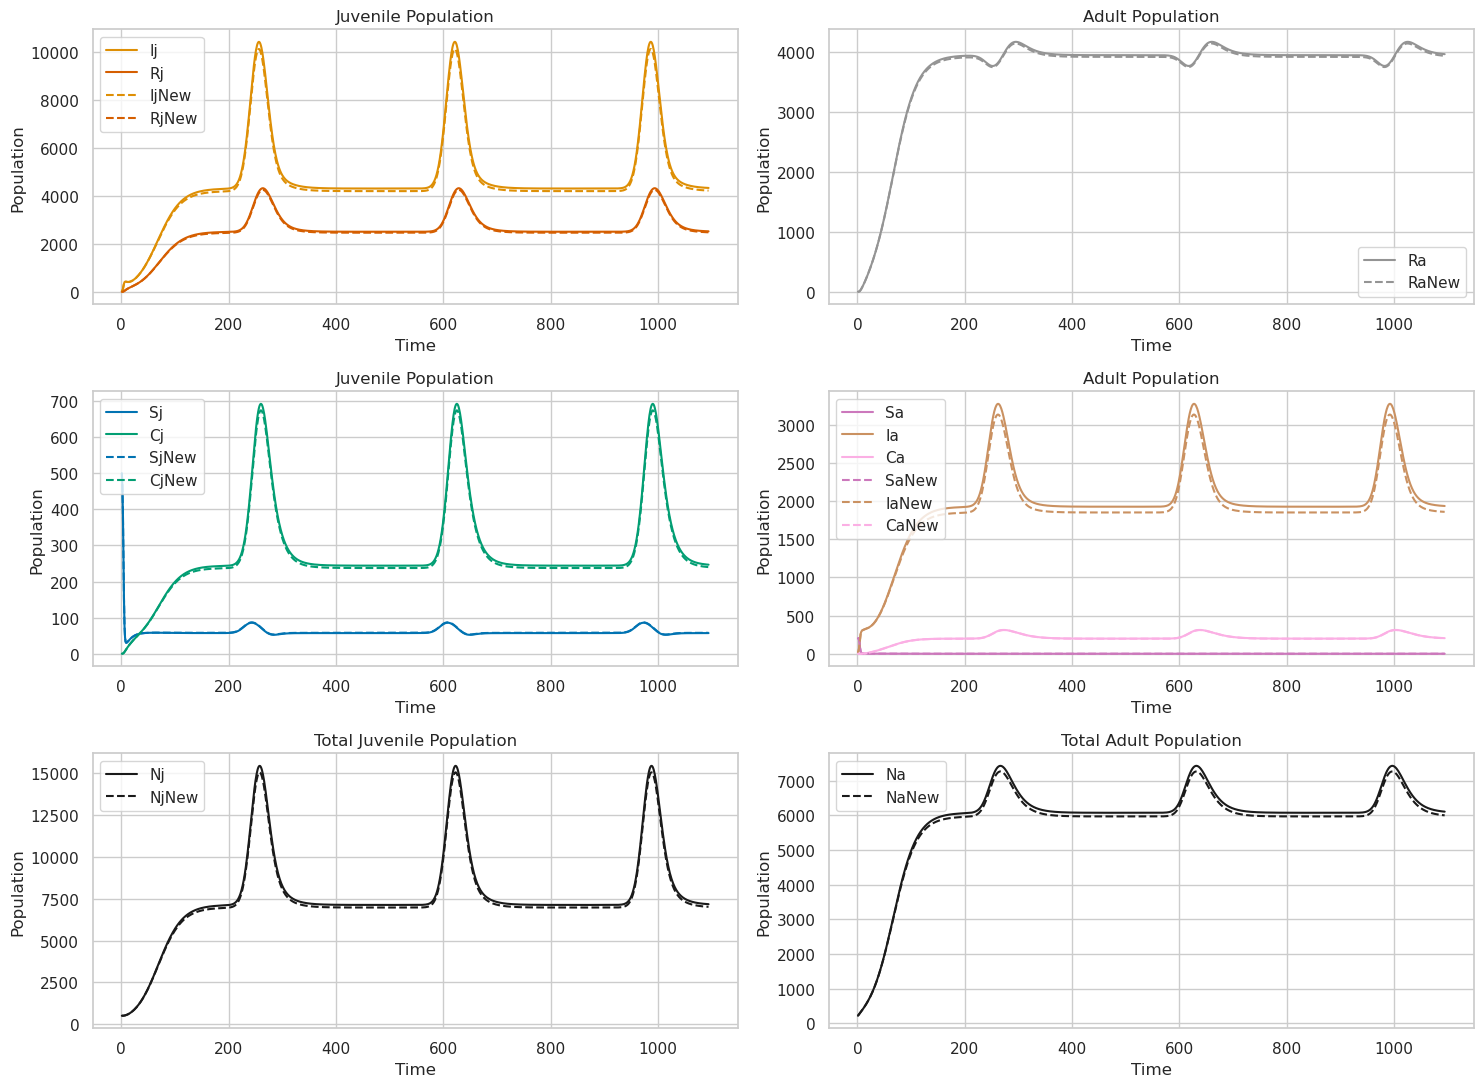

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import seaborn as sns  # Import seaborn for enhanced aesthetics
# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")
# Define colors using seaborn palette
colors = sns.color_palette('colorblind', 8)


# Constants
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = 1.45e-3 / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664
mu_j = 0.0028
mu_a = 0.0037
gamma_j = 0.0457
gamma_a = 0.0457
q = 0
t = np.arange(1.0, 365.0 * 3, 1)

# Birth pulse
def calculate_nu(t):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * t / 365 - varphi) ** 2))

# Model equations
def model(X, t):
    # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) 
    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) 
    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))
    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))
    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))
    dIadt = Tj*Ij +((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))
    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))
    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Model equations (new)
def model_new(X_new, t):
 # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X_new
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    nu1=N/K
    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj*nu1
    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-theta*mu_j*Ij*nu1
    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj*nu1
    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj*nu1
    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa*nu1
    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-theta*mu_a*Ia*nu1
    dCadt = Tj*Cj-theta*mu_a*Ca*nu1
    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra*nu1

    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Initial conditions
initial = [500, 10, 0, 0, 200, 20, 0, 0]
X = odeint(model, initial, t)
X_new = odeint(model_new, initial, t)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
#fig.suptitle(r'Population Dynamics ($\theta$ only in $I$ & $C$ class)', fontsize=16)

# Juvenile subplot
ax = axes[0, 0]
#ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 1], '-', color=colors[1], label='Ij')
#ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')
ax.plot(t, X[:, 3], '-', color=colors[3], label='Rj')

ax.plot(t, X_new[:, 1], '--', color=colors[1], label='IjNew')
ax.plot(t, X_new[:, 3], '--', color=colors[3], label='RjNew')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[0, 1]
#ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
#ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
#ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')
ax.plot(t, X[:, 7], '-', color=colors[7], label='Ra')


ax.plot(t, X_new[:, 7], '--', color=colors[7], label='RaNew')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Juvenile subplot
ax = axes[1, 0]
ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')

ax.plot(t, X_new[:, 0], '--', color=colors[0], label='SjNew')
ax.plot(t, X_new[:, 2], '--', color=colors[2], label='CjNew')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[1, 1]
ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')

ax.plot(t, X_new[:, 4], '--', color=colors[4], label='SaNew')
ax.plot(t, X_new[:, 5], '--', color=colors[5], label='IaNew')
ax.plot(t, X_new[:, 6], '--', color=colors[6], label='CaNew')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Juvenile Population subplot
ax = axes[2, 0]
ax.plot(t, np.sum(X[:, :4], axis=1), '-k', label='Nj')

ax.plot(t, np.sum(X_new[:, :4], axis=1), '--k', label='NjNew')
ax.set_title('Total Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Adult Population subplot
ax = axes[2, 1]
ax.plot(t, np.sum(X[:, 4:8], axis=1), '-k', label='Na')

ax.plot(t, np.sum(X_new[:, 4:8], axis=1), '--k', label='NaNew')
ax.set_title('Total Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot 
plt.savefig('Population_Dynamics_theta_I_and_C_class.pdf', dpi=300, bbox_inches='tight', metadata={'Author': 'Reju Sam John', 'Title': 'Population_Dynamics'})
# Show the plot
plt.show()

### $\theta$ only in all relevant class

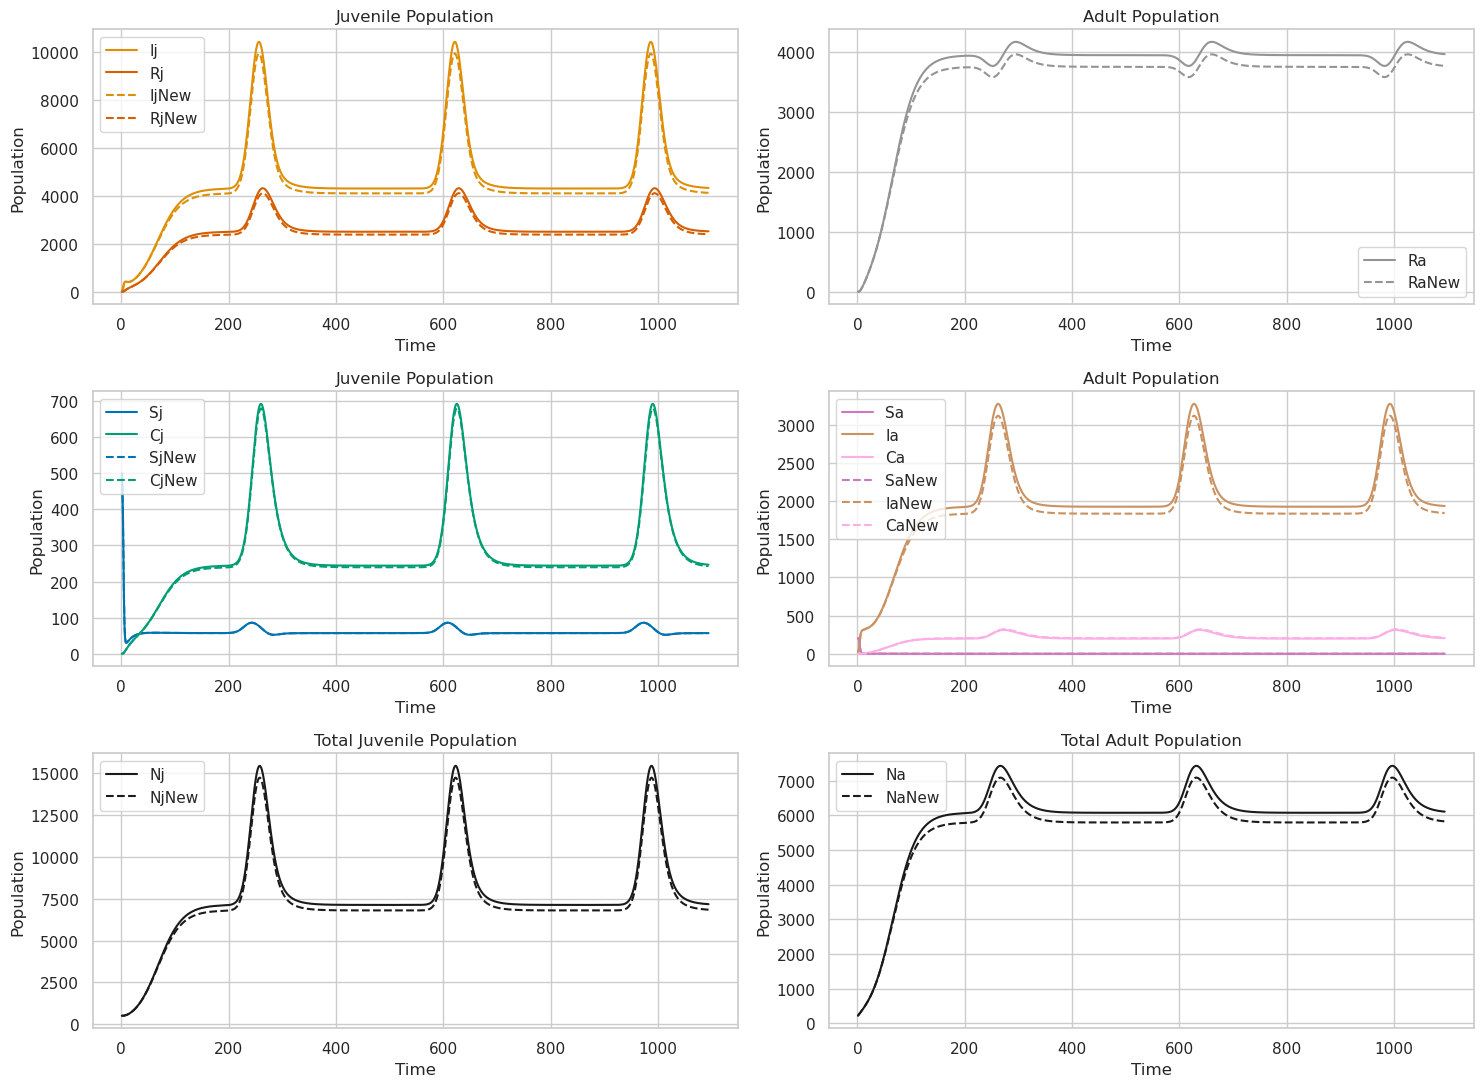

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import seaborn as sns  # Import seaborn for enhanced aesthetics
# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")
# Define colors using seaborn palette
colors = sns.color_palette('colorblind', 8)


# Constants
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = 1.45e-3 / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664
mu_j = 0.0028
mu_a = 0.0037
gamma_j = 0.0457
gamma_a = 0.0457
q = 0
t = np.arange(1.0, 365.0 * 3, 1)

# Birth pulse
def calculate_nu(t):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * t / 365 - varphi) ** 2))

# Model equations
def model(X, t):
    # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) 
    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) 
    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))
    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))
    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))
    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))
    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))
    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Model equations (new)
def model_new(X_new, t):
 # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X_new
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    nu1=N/K
    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-theta*mu_j*Sj*nu1
    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-theta*mu_j*Ij*nu1
    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj*nu1
    dRjdt = gamma_j*Ij-Tj*Rj-theta*mu_j*Rj*nu1
    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-theta*mu_a*Sa*nu1
    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-theta*mu_a*Ia*nu1
    dCadt = Tj*Cj-theta*mu_a*Ca*nu1
    dRadt = gamma_a*Ia+Tj*Rj-theta*mu_a*Ra*nu1

    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Initial conditions
initial = [500, 10, 0, 0, 200, 20, 0, 0]
X = odeint(model, initial, t)
X_new = odeint(model_new, initial, t)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
#fig.suptitle(r'Population Dynamics ($\theta$ in all class)', fontsize=16)

# Juvenile subplot
ax = axes[0, 0]
#ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 1], '-', color=colors[1], label='Ij')
#ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')
ax.plot(t, X[:, 3], '-', color=colors[3], label='Rj')

ax.plot(t, X_new[:, 1], '--', color=colors[1], label='IjNew')
ax.plot(t, X_new[:, 3], '--', color=colors[3], label='RjNew')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[0, 1]
#ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
#ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
#ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')
ax.plot(t, X[:, 7], '-', color=colors[7], label='Ra')


ax.plot(t, X_new[:, 7], '--', color=colors[7], label='RaNew')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Juvenile subplot
ax = axes[1, 0]
ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')

ax.plot(t, X_new[:, 0], '--', color=colors[0], label='SjNew')
ax.plot(t, X_new[:, 2], '--', color=colors[2], label='CjNew')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[1, 1]
ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')

ax.plot(t, X_new[:, 4], '--', color=colors[4], label='SaNew')
ax.plot(t, X_new[:, 5], '--', color=colors[5], label='IaNew')
ax.plot(t, X_new[:, 6], '--', color=colors[6], label='CaNew')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Juvenile Population subplot
ax = axes[2, 0]
ax.plot(t, np.sum(X[:, :4], axis=1), '-k', label='Nj')

ax.plot(t, np.sum(X_new[:, :4], axis=1), '--k', label='NjNew')
ax.set_title('Total Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Adult Population subplot
ax = axes[2, 1]
ax.plot(t, np.sum(X[:, 4:8], axis=1), '-k', label='Na')

ax.plot(t, np.sum(X_new[:, 4:8], axis=1), '--k', label='NaNew')
ax.set_title('Total Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot 
plt.savefig('Population_Dynamics_theta_in_all_class.pdf', dpi=300, bbox_inches='tight', metadata={'Author': 'Reju Sam John', 'Title': 'Population_Dynamics'})
# Show the plot
plt.show()

In [14]:
import numpy as np
from scipy.stats import ttest_rel

# Helper function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Helper function to calculate relative error
def relative_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100

# Extract solution arrays
X = np.transpose(X)
X_new = np.transpose(X_new)

# Calculate error metrics for each population compartment
mse = [mean_squared_error(X[:, i], X_new[:, i]) for i in range(X.shape[1])]
print("Mean Squared Error (MSE) for each population compartment:")
print(mse)

# Calculate relative error for each time point and population compartment
rel_err = relative_error(X, X_new)

# Perform statistical significance testing (paired t-test)
t_stats, p_vals = [], []
for i in range(X.shape[1]):
    t_stat, p_val = ttest_rel(X[:, i], X_new[:, i])
    t_stats.append(t_stat)
    p_vals.append(p_val)

print("\nStatistical Significance (p-values) for each population compartment:")
print(p_vals)

# Sensitivity analysis (example: varying rho parameter)
rho_values = [0.05, 0.1, 0.15]
mse_rho = []
for rho_val in rho_values:
    X_rho = odeint(model, initial, t, args=(rho_val,))
    X_new_rho = odeint(model_new, initial, t, args=(rho_val,))
    mse_rho.append(mean_squared_error(X_rho[:, 1], X_new_rho[:, 1]))  # For Ij compartment

print("\nSensitivity analysis (MSE for Ij compartment with varying rho):")
print(mse_rho)

# Plot relative error over time (example: for Ij compartment)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, rel_err[:, 1], label='Relative Error (Ij)')
plt.xlabel('Time')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error over Time (Ij)')
plt.legend()
plt.show()

Mean Squared Error (MSE) for each population compartment:
[0.0, 0.000354349486107298, 0.001013007566454746, 0.003442808586884068, 0.010316981537202573, 0.01598858187897163, 0.019378181125844177, 0.02302302238354481, 0.027803508485210005, 0.0337958093678113, 0.040985970081783146, 0.04942402101756019, 0.059234357541067324, 0.07060394251188505, 0.08377173607797848, 0.09902230733268838, 0.11668289287194328, 0.13712283175685047, 0.16075456667989152, 0.18803568160914194, 0.21947167267513584, 0.25561921726721604, 0.2970898866746314, 0.3445541948490101, 0.39874600249973746, 0.4604671382921726, 0.5305926233581459, 0.6100759017098624, 0.699954706759838, 0.801357057725411, 0.915507932571411, 1.0437360220701246, 1.1874811688388485, 1.3483020118139772, 1.5278843198663141, 1.7280485720542935, 1.9507593337485476, 2.1981343900873593, 2.4724530920651286, 2.7761674191675505, 3.111909525585422, 3.4825038440032055, 3.890975290526616, 4.340560667024256, 4.834718572835502, 5.377139656663955, 5.9717575238110

/tmp/ipykernel_63962/2438615924.py:10: RuntimeWarning: invalid value encountered in divide
  return np.abs((y_true - y_pred) / y_true) * 100



Statistical Significance (p-values) for each population compartment:
[nan, 0.11181623920607377, 0.03737736901859211, 0.09944025049893357, 0.21472743745702458, 0.20386359254654243, 0.15221469099481558, 0.11254820813224826, 0.08834151817099298, 0.07331432596048039, 0.06324700720423287, 0.05605603212886035, 0.05073792308631783, 0.04677144512256268, 0.04385026886129847, 0.041769882655698996, 0.0403796780322863, 0.039561681504664, 0.03922012443699869, 0.039275556493795306, 0.03966106225994977, 0.04031958492760553, 0.041201993289240166, 0.04226565295992568, 0.043473392751959765, 0.044792682542299324, 0.04619516257846003, 0.04765613491020145, 0.049154269989138424, 0.05067125179391469, 0.05219155486562383, 0.05370216733707004, 0.055192380831163186, 0.056653529627575396, 0.05807879592912489, 0.05946289736297605, 0.060801956983476374, 0.06209330489166287, 0.06333521478954948, 0.06452685767165822, 0.06566799787048833, 0.0667590109075672, 0.06780065591474829, 0.06879404127508869, 0.06974052602939

TypeError: model() takes 2 positional arguments but 3 were given